Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [48]:
import pandas as pd
import seaborn as sns
import spacy
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [11]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [86]:
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


In [87]:
train.size

12261

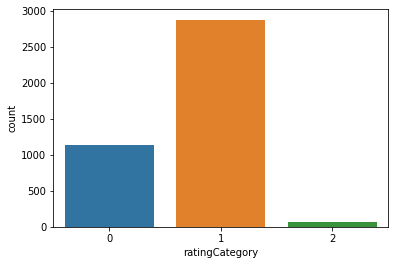

In [3]:
sns.countplot(x='ratingCategory', data=train);

In [4]:
train['ratingCategory'].value_counts()

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

### Define Pipeline Components

In [19]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = GradientBoostingClassifier()
pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [24]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (.02, .05, 0.1),
    'vect__max_features': (500, 1000),
    'clf__n_estimators': (100, 150),
    'clf__min_samples_leaf': (1, 3, 5)
#     'clf__max_depth': (15, 20)
}

In [25]:
X = train['description']
y = train['ratingCategory']
grid_search = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [26]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.75, max_features=500,
                                 min_df=0.02, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pa...
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
          

In [27]:
grid_search.best_score_

0.7220466140847782

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [28]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [29]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [30]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [31]:
subNumber = 0

In [32]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [37]:
svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)
# TAKEN FROM BEST PARAMETERS ABOVE
vect = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,2),
                       max_df=0.75,
                       max_features=500,
                       min_df=0.02)
clf = GradientBoostingClassifier(min_samples_leaf=1,
                                 n_estimators=100)

In [38]:
lsi = Pipeline([('vect', vect), ('svd', svd)])
pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [39]:
parameters = {
    'lsi__svd__n_components': [10,100,250],
    'lsi__svd__algorithm': ['arpack', 'randomized']
}

In [40]:
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=0.75,
            

In [42]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('lsi',
                 Pipeline(memory=None,
                          steps=[('vect',
                                  TfidfVectorizer(analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, max_df=0.75,
                                                  max_features=500, min_df=0.02,
                                                  ngram_range=(1, 2), norm='l2',
                                                  preprocessor=None,
                                                  smooth_idf=True,
                                                  stop_words='english',
                                                  stri

In [41]:
grid_search.best_score_

0.7291417404602084

### Make a Submission File

In [43]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [44]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [45]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [46]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [49]:
nlp = spacy.load('en_core_web_lg')

In [50]:
def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [51]:
X = get_word_vectors(train['description'])

In [53]:
vicktor = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=10000)
X_tfidf = vicktor.fit_transform(train['description'])

In [58]:
df = pd.DataFrame(X_tfidf.todense(), columns=vicktor.get_feature_names())

In [63]:
classifier = GradientBoostingClassifier()

In [67]:
param_dist = {
    'max_depth': (5, 10),
    'min_samples_leaf': (2, 5, 10)
}

In [80]:
search = RandomizedSearchCV(classifier, param_dist, cv=3, n_jobs=-1, verbose=1)
classifier.fit(X, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Make a Submission File

In [82]:
# Predictions on test sample
pred = classifier.predict(get_word_vectors(test['description']))

In [83]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [84]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [85]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 75% accuracy on the Kaggle competition. Once you have achieved 75% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?

**What is "Sentiment Analysis"?**

Using ML techniques to identify subjective (feelings) information about text

**Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response**

Document classification seems to be more concerned with correctly placing documents in categories/bins. Like if a book is fiction, non-fiction, science-fiction, etc. Sentiment analysis seems to be more concerned with how a reader responded to a certain book, liked it, didn't like it, etc.

**How do create labeled sentiment data? Are those labels really sentiment?**

Although there is likely more sophisticated sentiment models, a few of the sentiment techniques I read about/have seen, seem to take their labels from the existing corpus/text, extracting "happy", "sad", "excited", etc. While these labels, may get at an underlying feeling, they seem to be limited to existing words, reductive as to limit the overall sentiment, and may be only specific to a subcomponent (part of the product) and not accurately reflect the sentiment of the whole.

**What are common applications of sentiment analysis?**

Websites can use text data collected from their users to get their sentiment on certain products (food, movies, music, etc) and then use this sentiment to recommend additional products

**Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.**

It seems that maybe each email contained more text than the whiskey reviews, leading to more effective embeddings, but I'm not sure

**Neural Networks are becoming more popular for document classification. Why is that the case?**

I wasn't able to get a good answer on this, but my guess would be that increased computing power has made training neural networks more feasible